In [16]:
!pip install lightgbm
!pip install wheel

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
#from lightgbm import LGBMRegressor

In [48]:
air = pd.read_csv("../Resources/airdata.csv")
air = air.drop(columns = {"Unnamed: 0", "Country", "count", "min", "variance", "Specie"})
air.head()

,Date,City,max,median
0,2019-10-25,Mumbai,146.0,60.0
1,2019-11-15,Mumbai,182.0,158.0
2,2019-12-01,Mumbai,215.0,175.0
3,2019-12-04,Mumbai,834.0,135.0
4,2019-10-07,Mumbai,168.0,123.0


In [49]:
data = air.copy()

from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
y=data["City"]
label_encoder = LabelEncoder()
label_encoder.fit(y)
data['CityID'] = label_encoder.transform(y)
data.tail()

y=data["Date"]
label_encoder.fit(y)
data['DateID'] = label_encoder.transform(y)
data.tail()

,Date,City,max,median,CityID,DateID
1981,2020-03-30,Hong Kong,80.0,52.0,2,182
1982,2020-03-31,Hong Kong,92.0,50.0,2,183
1983,2020-01-14,Hong Kong,122.0,74.0,2,106
1984,2020-02-04,Hong Kong,97.0,61.0,2,127
1985,2020-02-20,Hong Kong,90.0,57.0,2,143


In [51]:
#new thing:
data = data.sort_values(by = ["DateID"])
data['DatePriorMed'] = data.groupby(['City'])['median'].shift()
data['Daily_Diff'] = data.groupby(['City'])['DatePriorMed'].diff()
data = data.dropna()

data.head()

,Date,City,max,median,CityID,DateID,DatePriorMed,Daily_Diff
577,2019-10-02,Florence,50.0,30.0,1,2,42.0,12.0
10,2019-10-02,Mumbai,153.0,55.0,5,2,38.0,10.0
378,2019-10-02,Beijing,166.0,137.0,0,2,129.0,-26.0
191,2019-10-02,Hong Kong,160.0,109.0,2,2,135.0,-19.0
207,2019-10-02,London,89.0,25.0,3,2,30.0,5.0


In [52]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [53]:
mean_error = []
for date in range(4,200):
    train = data[data['DateID'] < date]
    val = data[data['DateID'] == date]

    p = val['DatePriorMed'].values

    error = rmsle(val['median'].values, p)
    print('Date %d - Error %.5f' % (date, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Date 4 - Error 0.74074
Date 5 - Error 0.28455
Date 6 - Error 0.40416
Date 7 - Error 0.43428
Date 8 - Error 0.65243
Date 9 - Error 0.50772
Date 10 - Error 0.33139
Date 11 - Error 0.28666
Date 12 - Error 0.22686
Date 13 - Error 0.17580
Date 14 - Error 0.38869
Date 15 - Error 0.28939
Date 16 - Error 0.47878
Date 17 - Error 0.33458
Date 18 - Error 0.18549
Date 19 - Error 0.26068
Date 20 - Error 0.23315
Date 21 - Error 0.41444
Date 22 - Error 0.39786
Date 23 - Error 0.23932
Date 24 - Error 0.15982
Date 25 - Error 0.70993
Date 26 - Error 0.41405
Date 27 - Error 0.27666
Date 28 - Error 0.41522
Date 29 - Error 0.38209
Date 30 - Error 0.33296
Date 31 - Error 0.36386
Date 32 - Error 0.35904
Date 33 - Error 0.26875
Date 34 - Error 0.48354
Date 35 - Error 0.30164
Date 36 - Error 0.18820
Date 37 - Error 0.29069
Date 38 - Error 0.50466
Date 39 - Error 0.36900
Date 40 - Error 0.36349
Date 41 - Error 0.29794
Date 42 - Error 0.33532
Date 43 - Error 0.36882
Date 44 - Error 0.53601
Date 45 - Error 0.3191

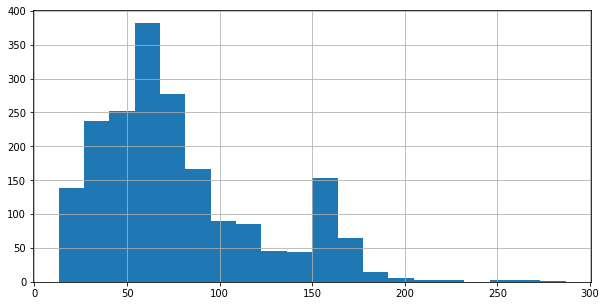

In [54]:
data['median'].hist(bins=20, figsize=(10,5))

In [55]:
data2=data.drop(columns = {"Date", "City"})
mean_error = []
for day in range(4,200):
    train = data2[data2['DateID'] < day]
    val = data2[data2['DateID'] == day]

    xtr, xts = train.drop(['median'], axis=1), val.drop(['median'], axis=1)
    ytr, yts = train['median'].values, val['median'].values

    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)

    p = mdl.predict(xts)

    error = rmsle(yts, p)
    print('Day %d - Error %.5f' % (day, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Day 4 - Error 0.71442
Day 5 - Error 0.24521
Day 6 - Error 0.29389
Day 7 - Error 0.38547
Day 8 - Error 0.55234
Day 9 - Error 0.20311
Day 10 - Error 0.21256
Day 11 - Error 0.17717
Day 12 - Error 0.25851
Day 13 - Error 0.38974
Day 14 - Error 0.35324
Day 15 - Error 0.14377
Day 16 - Error 0.25448
Day 17 - Error 0.17415
Day 18 - Error 0.32169
Day 19 - Error 0.15094
Day 20 - Error 0.21246
Day 21 - Error 0.28756
Day 22 - Error 0.30856
Day 23 - Error 0.14036
Day 24 - Error 0.14205
Day 25 - Error 0.71174
Day 26 - Error 0.18993
Day 27 - Error 0.25386
Day 28 - Error 0.32606
Day 29 - Error 0.29140
Day 30 - Error 0.13069
Day 31 - Error 0.20468
Day 32 - Error 0.50396
Day 33 - Error 0.25194
Day 34 - Error 0.36006
Day 35 - Error 0.11063
Day 36 - Error 0.14963
Day 37 - Error 0.25116
Day 38 - Error 0.31322
Day 39 - Error 0.20394
Day 40 - Error 0.24784
Day 41 - Error 0.31497
Day 42 - Error 0.30026
Day 43 - Error 0.24117
Day 44 - Error 0.50081
Day 45 - Error 0.11320
Day 46 - Error 0.12404
Day 47 - Error 0.

In [56]:
data3 = data.copy()
data3['DateMinus2Med'] = data3.groupby(['City'])['median'].shift(2)
data3['DateMinus2Diff'] = data3.groupby(['City'])['DateMinus2Med'].diff()
data3 = data3.dropna()
data3.head()

,Date,City,max,median,CityID,DateID,DatePriorMed,Daily_Diff,DateMinus2Med,DateMinus2Diff
271,2019-10-05,London,112.0,36.0,3,5,46.0,0.0,46.0,21.0
781,2019-10-05,Santiago,73.0,63.0,7,5,52.0,12.0,40.0,8.0
183,2019-10-05,Hong Kong,93.0,63.0,2,5,70.0,-10.0,80.0,-29.0
47,2019-10-05,Mumbai,152.0,97.0,5,5,75.0,15.0,60.0,5.0
351,2019-10-05,Beijing,61.0,25.0,0,5,21.0,-128.0,149.0,12.0


In [57]:
data3=data3.drop(columns = {"Date", "City"})
mean_error = []
for day in range(10,200):
    train = data3[data3['DateID'] < day]
    val = data3[data3['DateID'] == day]

    xtr, xts = train.drop(['median'], axis=1), val.drop(['median'], axis=1)
    ytr, yts = train['median'].values, val['median'].values

    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)

    p = mdl.predict(xts)

    error = rmsle(yts, p)
    print('Day %d - Error %.5f' % (day, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Day 10 - Error 0.15306
Day 11 - Error 0.22207
Day 12 - Error 0.28455
Day 13 - Error 0.47074
Day 14 - Error 0.36166
Day 15 - Error 0.13674
Day 16 - Error 0.34094
Day 17 - Error 0.18752
Day 18 - Error 0.14945
Day 19 - Error 0.13757
Day 20 - Error 0.26647
Day 21 - Error 0.27239
Day 22 - Error 0.26802
Day 23 - Error 0.15601
Day 24 - Error 0.15306
Day 25 - Error 0.71013
Day 26 - Error 0.24317
Day 27 - Error 0.24160
Day 28 - Error 0.36084
Day 29 - Error 0.26808
Day 30 - Error 0.13270
Day 31 - Error 0.21176
Day 32 - Error 0.52014
Day 33 - Error 0.27374
Day 34 - Error 0.39249
Day 35 - Error 0.14631
Day 36 - Error 0.15794
Day 37 - Error 0.20600
Day 38 - Error 0.33881
Day 39 - Error 0.17948
Day 40 - Error 0.19245
Day 41 - Error 0.30925
Day 42 - Error 0.29304
Day 43 - Error 0.27703
Day 44 - Error 0.54119
Day 45 - Error 0.10475
Day 46 - Error 0.12889
Day 47 - Error 0.20002
Day 48 - Error 0.22418
Day 49 - Error 0.42006
Day 50 - Error 0.20770
Day 51 - Error 0.23311
Day 52 - Error 0.19469
Day 53 - Er

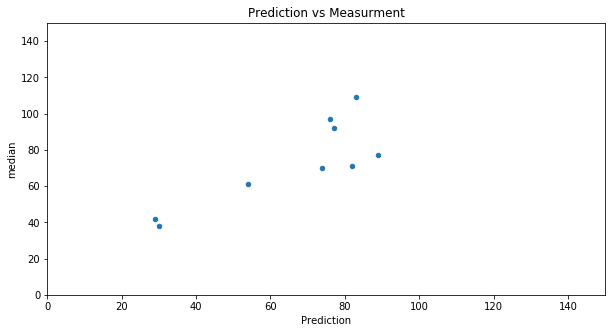

In [61]:
val.loc[:, 'Prediction'] = np.round(p)
val.plot.scatter(x='Prediction', y='median', figsize=(10,5), title='Prediction vs Measurment', 
                 ylim=(0,150), xlim=(0,150))

In [ ]:
#NOW WHAT?!!?

In [14]:
# Assign the data to X and y

X = data3[["DateID"]]
y = data3["median"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1941, 1) (1941, 1)


In [15]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [16]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [22]:
# Fit the model to the training data and calculate the scores for the training and testing data


### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.004709897359500226
Testing Score: 0.006588723754697323


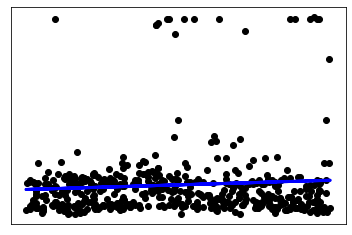

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set

y_pred = regr.predict(X_test)

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
#NOW WHAT?!